# **Statistics for Angle to ablation Analysis**
(Stats_Angles2Ablation) by Stephane Verger

This notebook proposes various statistical analysis of the data (descriptive and inferential), obtained from the quantification output of the Angle2Ablation.ijm macro.

* **1- Single condition/timepoint:** Display data, mean angle and anisotropy, histogram representation, and data distrubution skewness and mode.
* **2- Multiple condition and time points comparisons:** Same as single (1-) but does it for multiple subfolders (corresponding to different condition/timepoints) in a folder. Then displays boxplots of the of angles and anisotropies comparing different samples and generate statistical test to test the significance of difference between samples.
* **3- Timelapses...Todo**

First load packages and functions (click on the cell and hit enter+shift to run it).
Then run each cell one by one depending on the analysis you want to perform.

### **Load required packages**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Show packages version number

In [2]:
%load_ext watermark
%watermark -v -m -p pip,jupyterlab,pandas,numpy,matplotlib,seaborn,scipy,watermark

CPython 3.7.9
IPython 7.19.0

pip 20.2.4
jupyterlab 2.1.5
pandas 1.1.3
numpy 1.19.2
matplotlib 3.2.2
seaborn 0.10.1
scipy 1.5.0
watermark 2.0.2

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-96-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


## **1. Single condition/timepoint**
To examine each data groups descriptive statistics independently. Can be useful before comparative analysis, but not mandatory. Similar data is automatically generated for each compared conditions in "2- Multiple condition and time points comparisons". This part of the notebook can also be useful if you want to modify part of the analysis pipeline to test different functions and paramaters by modifying the code (e.g. for the histogram layout).

Run at least once the function in "1.4. Make histograms of angles" to load it before running the multiple comparison.

### **1.1. Load data**
Below, in single_file_path, define the full path to the file containing all the data to analyse and compare (All_..._Angle2Ablation.txt). Use tab to help navigation in the folders.

The file path should contain no space (character).

In [3]:
single_file_path = '/home/stephane/Desktop/timelapse_test/Timelapse_comparisons/GFP-Tua6/

Extracts the folder name and path for figure labelling

In [4]:
single_folder_path = os.path.dirname(single_file_path)
single_folder_name = os.path.basename(single_folder_path) 
print (single_folder_path)
print (single_folder_name)

/home/stephane/Desktop/timelapse_test/20150421-GFP-Tua6-MBD_timelapse-4h/SurfCutResult
SurfCutResult


### **1.2. Display the data in a table**
Show content of the file loaded above

In [5]:
single_data = pd.read_csv(single_file_path, sep = "\t")
single_data

,Genotype/condition,Sample Number,CellNumber,FibrilTool Angle,Drawn Line Angle,Raw angle,Absolute angle,Acute absolute angle to ablation,Anisotropy
0,SurfCutResult,1,1,108.4349,146.7683,-38.3333,38.3333,38.3333,0.0228
1,SurfCutResult,1,2,26.5651,65.6136,-39.0486,39.0486,39.0486,0.0259
2,SurfCutResult,1,3,30.9638,127.1847,-96.2209,96.2209,83.7791,0.0511
3,SurfCutResult,1,4,45.0000,130.8151,-85.8151,85.8151,85.8151,0.0333
4,SurfCutResult,1,5,21.8014,120.1414,-98.3400,98.3400,81.6600,0.0397
...,...,...,...,...,...,...,...,...,...
95,SurfCutResult,10,6,48.8141,39.4007,9.4134,9.4134,9.4134,0.0509
96,SurfCutResult,10,7,180.0000,60.4612,119.5388,119.5388,60.4612,0.0154
97,SurfCutResult,10,8,123.6901,136.4502,-12.7601,12.7601,12.7601,0.0574
98,SurfCutResult,10,9,111.8014,103.1858,8.6156,8.6156,8.6156,0.0285


### **1.3. Descriptive statistics**
Calculate the number of samples (count), mean value, standard deviation, lowest and highest values (min/max), and percentiles (50% = median) of the angle and anisotropy values.

In [6]:
Angle_desc_stats = single_data['Acute absolute angle to ablation'].describe()
Angle_desc_stats

count    100.000000
mean      36.821079
std       26.841976
min        0.657000
25%       13.729400
50%       31.013900
75%       60.461200
max       87.026300
Name: Acute absolute angle to ablation, dtype: float64

In [7]:
Anisotropy_desc_stats = single_data['Anisotropy'].describe()
Anisotropy_desc_stats

count    100.000000
mean       0.035721
std        0.018064
min        0.004000
25%        0.022250
50%        0.031650
75%        0.049500
max        0.081800
Name: Anisotropy, dtype: float64

### **1.4. Make histograms of angles**
Generates one histogram diplaying simply the distribution of the angles, and one histogram with added anisotropy weight. (Data for which the anisotropy is higher are given more weight in the histogram).

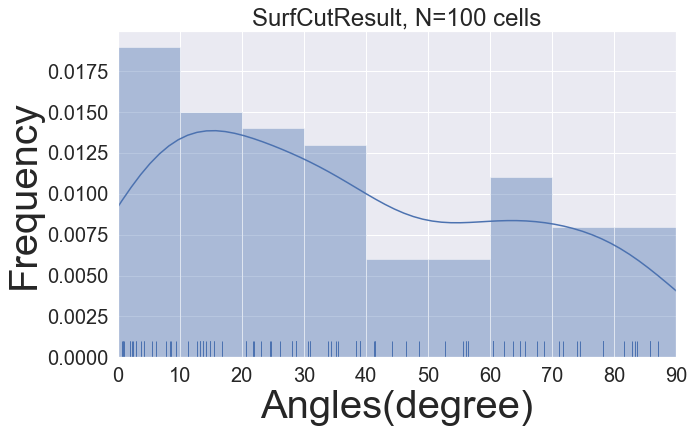

In [8]:
def makeAnglesHistogram(HistAngles, title):
    sns.set(rc={'figure.figsize':(10,6)}) # To change the size of the figure
    bins = np.linspace(0, 90, 10) # To change the number of histogram bin (bars).
    sns.distplot(HistAngles, bins=bins, rug=True)
    plt.xlabel('Angles(degree)', fontsize=40) # To change the axis labels and font size
    plt.ylabel('Frequency', fontsize=40) # To change the axis labels and font size
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(0,90)
    plt.title(title + ', N=' + str(len(HistAngles)) + ' cells', fontsize=24) # To change the figure title
    plt.grid(True)

SingleAngleHist = makeAnglesHistogram(single_data['Acute absolute angle to ablation'], single_folder_name)

### **1.5. Make box plots of angles and anisotropies**
Generates boxplot overlayed with stripplot diplaying the distribution of the angles as well as anisotropes, for each sample in the condition. Can allow to check if most samples behave in the same way.

The function defined here to make the box plot is the same one used in the multiple comparison later so the boxplot layout and  style can be changed here.

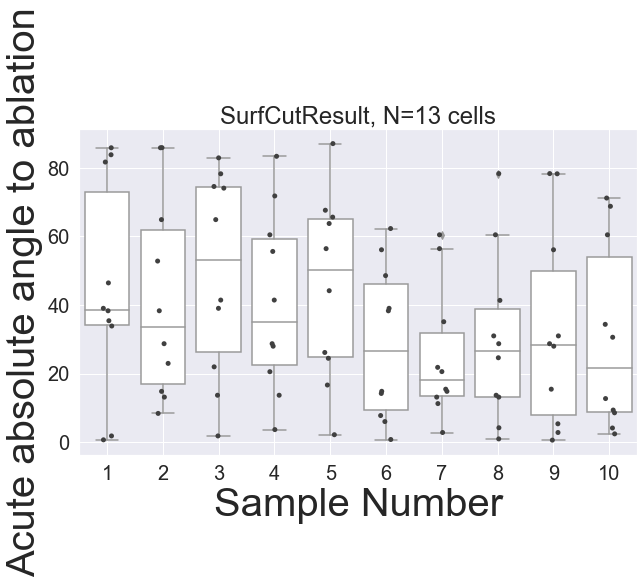

In [9]:
def makeStripBoxplot(StripBoxDataFile, sample, value, title):
    ax = sns.boxplot(x=sample, y=value, data=StripBoxDataFile, color='w')
    ax = sns.stripplot(x=sample, y=value, data=StripBoxDataFile, color='0.25')
    plt.xlabel(sample, fontsize=40) # To change the axis labels and font size
    plt.ylabel(value, fontsize=40) # To change the axis labels and font size
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(title + ', N=' + str(len(sample)) + ' cells', fontsize=24) # To change the figure title
    plt.grid(True)
    
SingleAngleBoxplot = makeStripBoxplot(single_data, 'Sample Number', 'Acute absolute angle to ablation', single_folder_name)

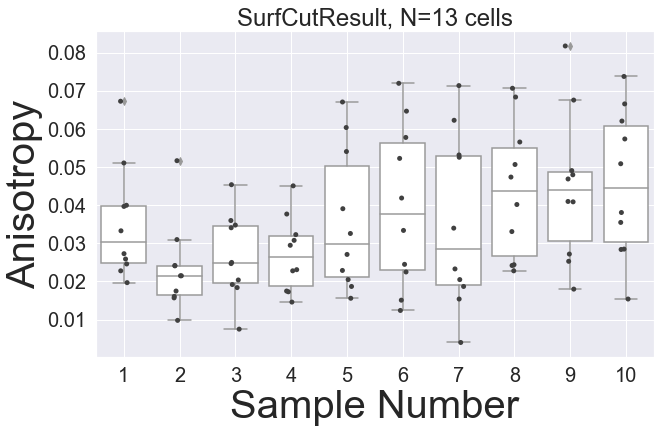

In [10]:
SingleAnisotropyBoxplot = makeStripBoxplot(single_data, 'Sample Number', 'Anisotropy', single_folder_name)

### **1.6. Skweness**
"Skew: For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to zero, statistically speaking. If the p-value is lower than 0.05, it can be considered that the distribution is significantly skewed." From https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

In [11]:
skew=stats.skew(single_data['Acute absolute angle to ablation'])
statskew, pskew=stats.skewtest(single_data['Acute absolute angle to ablation'])
print ("skew " + str(skew) + "\npvalue " + str(pskew))

skew 0.3748441833176364
pvalue 0.11280989955083966


### **1.7. Save output**

Todo...
Not necessary if you intend to perform multiple comparison with the condition examined here.

Define where to save the output.

In [ ]:
single_output_path = '/home/stephane/Desktop/Segmentation4FTBatch-master/response/'

In [ ]:
...To do figure.savefig(single_folder + "_histogram.svg")

## **2. Multiple condition and time points comparisons:** 
Same as single but does it for multiple subfolders (corresponding to different condition/mutant/timepoints) in a folder. In addition displays boxplots of the of angles and anisotropies comparing different samnples and generate statistical tests to determine i fthere is a difference between the compared samples.


### **2.1. Load data**
Below, in multiple_updir_path, define the full path to the folder containing the subfolders of the conditions and timepoint to compare. Use tab to help navigation in the folders.

In [15]:
multiple_updir_path = '/home/stephane/Desktop/timelapse_test/20150421-GFP-Tua6-MBD_timelapse-4h/Data/'

### **2.2. Generate and save descriptive statistics**
Number of samples, mean value, standard deviation,... Histogram, boxplots and test skewness for each condition. As in "1."


>>>Condition analyzed: test1

Acute absolute angle to ablation descriptive statistics:
count    100.000000
mean      36.821079
std       26.841976
min        0.657000
25%       13.729400
50%       31.013900
75%       60.461200
max       87.026300
Name: Acute absolute angle to ablation, dtype: float64

Anisotropy descriptive statistics:
count    100.000000
mean       0.035721
std        0.018064
min        0.004000
25%        0.022250
50%        0.031650
75%        0.049500
max        0.081800
Name: Anisotropy, dtype: float64

Angles distribution skeweness statistics:
skew 0.3748441833176364
pvalue 0.11280989955083966


>>>Condition analyzed: test2

Acute absolute angle to ablation descriptive statistics:
count    100.000000
mean      36.821079
std       26.841976
min        0.657000
25%       13.729400
50%       31.013900
75%       60.461200
max       87.026300
Name: Acute absolute angle to ablation, dtype: float64

Anisotropy descriptive statistics:
count    100.000000
mean       0.0

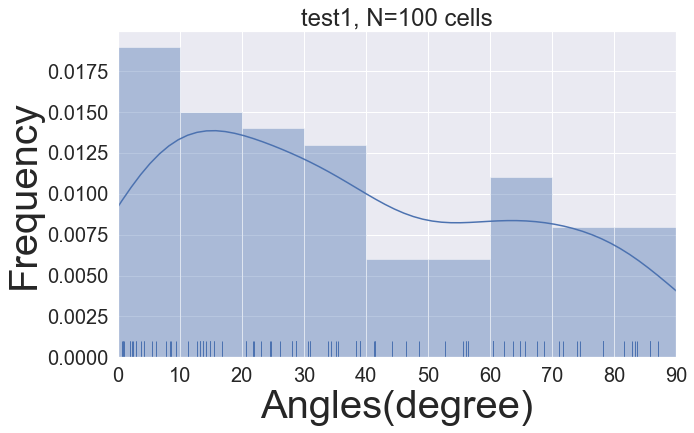

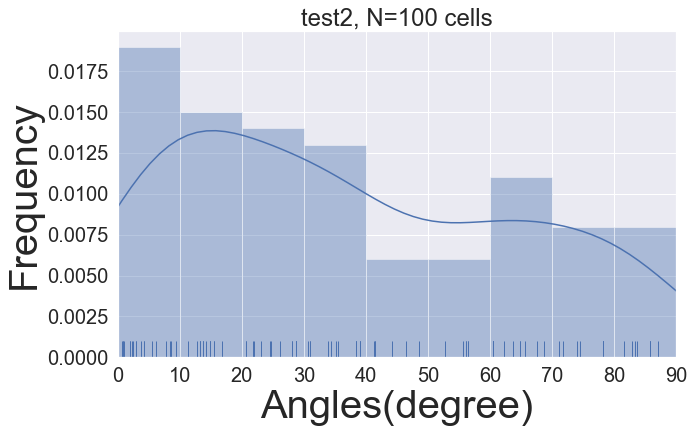

In [16]:
multi_data = pd.DataFrame(columns = ['Genotype/condition', 'Sample Number', 'CellNumber', 'FibrilTool Angle', 'Drawn Line Angle', 'Raw angle', 'Absolute angle', 'Acute absolute angle to ablation', 'Anisotropy'])
###Find subdirectories containing the experiments/conditions to analyse
for dirname in sorted(os.listdir(multiple_updir_path)):
    dirpath = multiple_updir_path + dirname
    if os.path.isdir(dirpath):
        if ".ipynb_checkpoints" in dirname:
            print (".ipynb_checkpoints folder skipped\n\n")
        else:
            print ("\n>>>Condition analyzed: " + dirname)
            
            ###Load data
            Result_file_name = 'All_' + dirname + '_Angle2Ablation.txt'
            data = pd.read_csv(dirpath + '/' + Result_file_name, sep = "\t")
            
            ###Descriptive statistics
            for datatype in ('Acute absolute angle to ablation', 'Anisotropy'):
                Multi_Angle_desc_stats = data[datatype].describe()
                print ("\n" + datatype + " descriptive statistics:")
                print (Multi_Angle_desc_stats)
                #print (data[datatype])
            
            #Skew
            skew=stats.skew(data['Acute absolute angle to ablation'])
            statskew, pskew=stats.skewtest(data['Acute absolute angle to ablation'])
            print ("\nAngles distribution skeweness statistics:")
            print ("skew " + str(skew) + "\npvalue " + str(pskew) + "\n")
            
            #Histogram Angles
            plt.figure(dirname + "angles")
            makeAnglesHistogram(data['Acute absolute angle to ablation'], dirname)
            #figure.savefig(multiple_updir_path + dirname + "_histogramfh.svg")
            
            ### Add the current subfolder name to the list of analyzed subfolder names
            multi_data = pd.concat([multi_data, data], ignore_index=True)

Display new dataframe generated containing all the values of all the conditions compared

In [18]:
multi_data

,Genotype/condition,Sample Number,CellNumber,FibrilTool Angle,Drawn Line Angle,Raw angle,Absolute angle,Acute absolute angle to ablation,Anisotropy
0,SurfCutResult,1,1,108.4349,146.7683,-38.3333,38.3333,38.3333,0.0228
1,SurfCutResult,1,2,26.5651,65.6136,-39.0486,39.0486,39.0486,0.0259
2,SurfCutResult,1,3,30.9638,127.1847,-96.2209,96.2209,83.7791,0.0511
3,SurfCutResult,1,4,45.0000,130.8151,-85.8151,85.8151,85.8151,0.0333
4,SurfCutResult,1,5,21.8014,120.1414,-98.3400,98.3400,81.6600,0.0397
...,...,...,...,...,...,...,...,...,...
195,SurfCutResult,10,6,48.8141,39.4007,9.4134,9.4134,9.4134,0.0509
196,SurfCutResult,10,7,180.0000,60.4612,119.5388,119.5388,60.4612,0.0154
197,SurfCutResult,10,8,123.6901,136.4502,-12.7601,12.7601,12.7601,0.0574
198,SurfCutResult,10,9,111.8014,103.1858,8.6156,8.6156,8.6156,0.0285


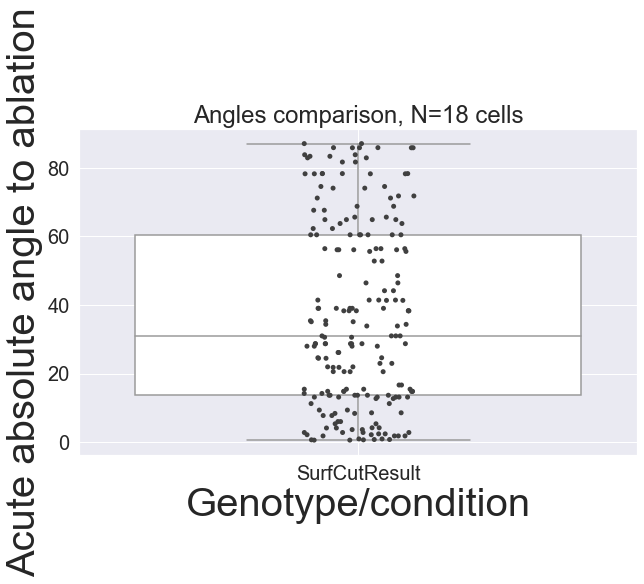

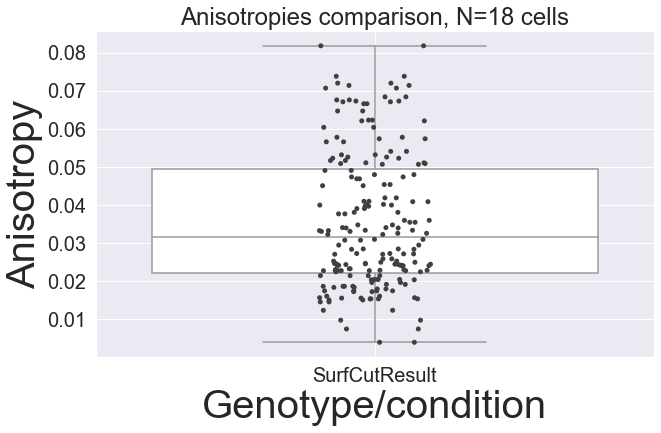

In [17]:
###Generate boxplot to compare anisotropies and angles
plt.figure("Angles comparison")
MultiAngleBoxplot = makeStripBoxplot(multi_data, 'Genotype/condition', 'Acute absolute angle to ablation', "Angles comparison")
plt.figure("Anisotropies comparison")
MultiAnisotropyBoxplot = makeStripBoxplot(multi_data, 'Genotype/condition', 'Anisotropy', "Anisotropies comparison")

### **Run statistical tests to compare CMT reorientation and anisotropy after response to ablation**

Genotypes and conditions to compare

In [ ]:
list_geno_cond = multi_data['Genotype/condition'].unique()
print ("There are " + str(len(list_geno_cond)) + " genotype and/or condition to compare:\n" + str(list_geno_cond))

In [ ]:
#Loop to compare each samples
for A in list_geno_cond:
    result_A = np.where(list_geno_cond == A)
    for B in list_geno_cond:
        result_B = np.where(list_geno_cond == B)
        if result_A[0]<result_B[0]:            
            print ("\n>>>Comparison of '" + A + "' and '" + B + "'")
            
            ###Process: 'Angles' --> angle_data_ and 'Anisotropy' --> anisotropy_data_ for each comparison
            for col_name in ('Acute absolute angle to ablation', 'Anisotropy'):
                data_inputA = multi_data[multi_data['Genotype/condition'] == A][col_name]
                data_inputB = multi_data[multi_data['Genotype/condition'] == B][col_name]
                #print (str(A) + " -> " + str(col_name) + "\n" + str(data_inputA))
                #print (str(B) + " -> " + str(col_name) + "\n" + str(data_inputB))
                
                ###Test decision 
                ###t-test can be done if both samples populations a normally distributed and have equal variance
                ###
        
                ###Shapiro's test for normality
                ###test sample A and then samples B
                norm = []
                print ("- Shapiro's test for normality:")
                for sample, name in zip((data_inputA, data_inputB), (A, B)):
                    w, pnorm = stats.shapiro(sample)
                    #print (sample)
                    if pnorm>0.05:
                        norm.append(True)
                        print (name + " " + col_name + " population IS normally distributed --> p-value is " + str(round(pnorm, 4)))
                    else:
                        norm.append(False)
                        print (name + " " + col_name + " population is NOT normally distributed--> p-value is " + str(round(pnorm, 4)))
                        
                ### Determine "t-test or Welchs test" or "wilcoxon rank sum test"
                if norm[0] and norm[1] is True:
                    print ("Both sample have normal distibution --> t-test or Welchs test\n")
            
                    ###Bartlett's test for equal variance (to determine between t-test and Welchs test)
                    print ("- Bartlett's test for equal variance")
                    t, pvar = stats.bartlett(data_inputA, data_inputB)
                    if pvar>0.05:
                        equalvar=True
                        print ("samples have equal variance--> t-test")
                    else:
                        equalvar=False
                        print ("samples do not have equal variance--> Welchs test")

                    ###t-test (Welch's if variances are unequal)
                    t2, pVal = stats.ttest_ind(data_inputA, data_inputB, equal_var=equalvar)

                ### If at least one sample has non normal population distribution: wilcoxon rank sum test
                else:
                    print ("At least one sample does Not have normal distibution --> wilcoxon rank sum test")
                    statrank, pVal = stats.ranksums(data_inputA, data_inputB)
        
        
                ### Comparison test output
                if pVal>0.05:
                    print ("###################################################################\n",
                           "--> " + col_name + " are NOT significantly different --> p-value is " + str(round(pVal,10)) +
                           "\n###################################################################\n")

                else:
                    print ("###################################################################\n",
                           "--> " + col_name + " are significantly different --> p-value is " + str(round(pVal,10)) +
                           "\n###################################################################\n")